# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve
from imblearn.under_sampling import RandomUnderSampler
warnings.filterwarnings(action='ignore')

In [104]:
#data 불러오기
data = pd.read_csv("assignment3_creditcard.csv")
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [105]:
# target, variable setting
x = data.drop(columns='Class')
y = data['Class']

In [106]:
#train, test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, stratify = y,shuffle=True ,random_state=42)

In [107]:
# min_max_scaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [108]:
#model train
model = LogisticRegression()
model.fit(x_train_scaled,y_train)

LogisticRegression()

In [109]:
#model prediction
pred=model.predict(x_test_scaled)

In [110]:
#confusion matrix
accuracy = metrics.accuracy_score(y_test, pred)
print("정확도:", accuracy)

precision = metrics.precision_score(y_test, pred)
print("정밀도:", precision)

recall = metrics.recall_score(y_test, pred)
print("재현율:", recall)

f1 = metrics.f1_score(y_test, pred)
print("f1 점수:", f1)

정확도: 0.9968619246861925
정밀도: 0.9795918367346939
재현율: 0.6486486486486487
f1 점수: 0.7804878048780487


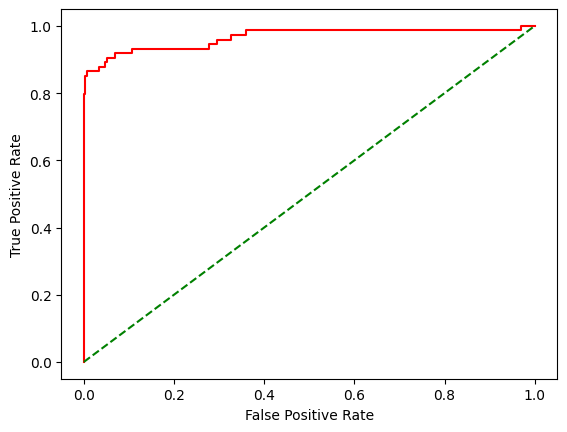

In [111]:
#ROC Curve
prob = model.predict_proba(x_test_scaled)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(y_test, prob)
plt.plot(fper, tper, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### 성능개선
- y 라벨의 imbalance를 undersampling을 통해 제거해보자

In [112]:
#label별 갯수 - 매우 불균형
y.value_counts()

0    28432
1      246
Name: Class, dtype: int64

In [113]:
# target, variable setting
x = data.drop(columns='Class')
y = data['Class']

In [114]:
#undersampling
undersample = RandomUnderSampler(sampling_strategy=0.1)
x_under, y_under = undersample.fit_resample(x,y)

In [115]:
#undersamplig 이후의 label의 갯수 
y_under.value_counts()

0    2460
1     246
Name: Class, dtype: int64

In [116]:
#train, test data split
x_train_under, x_test_under, y_train_under, y_test_under = train_test_split(x_under,y_under,test_size=0.3, shuffle=True, stratify = y_under, random_state=42)

In [117]:
# min_max_scaler
scaler = MinMaxScaler()
scaler.fit(x_train_under)
x_train_scaled_under = scaler.transform(x_train_under)
x_test_scaled_under = scaler.transform(x_test_under)

In [118]:
#model train
model = LogisticRegression()
model.fit(x_train_scaled_under,y_train_under)

LogisticRegression()

In [119]:
#model prediction
pred=model.predict(x_test_scaled_under)

In [120]:
#confusion matrix 
accuracy = metrics.accuracy_score(y_test_under, pred)
print("정확도:", accuracy)

precision = metrics.precision_score(y_test_under, pred)
print("정밀도:", precision)

recall = metrics.recall_score(y_test_under, pred)
print("재현율:", recall)

f1 = metrics.f1_score(y_test_under, pred)
print("f1 점수:", f1)

정확도: 0.9778325123152709
정밀도: 1.0
재현율: 0.7567567567567568
f1 점수: 0.8615384615384616


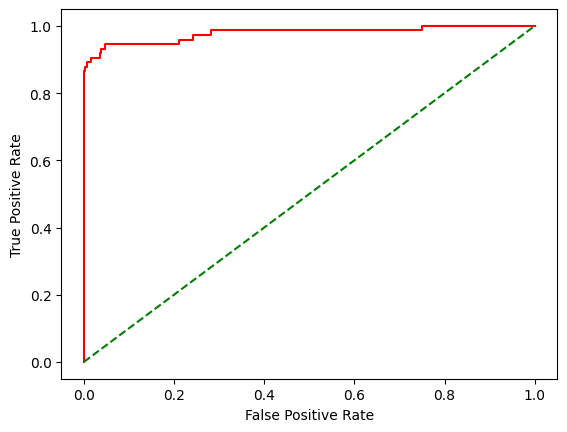

In [121]:
#ROC CURVE
prob = model.predict_proba(x_test_scaled_under)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(y_test_under, prob)
plt.plot(fper, tper, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()